In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data["Height"] = data["Height"] * 2.54
data["Weight"] = data["Weight"] * 0.45359237
data.replace(["Male","Female"],[0,1],inplace=True)

In [4]:
data.head()

,Gender,Height,Weight
0,0,187.571423,109.721075
1,0,174.706036,73.622792
2,0,188.239668,96.497629
3,0,182.196685,99.809586
4,0,177.499761,93.598695


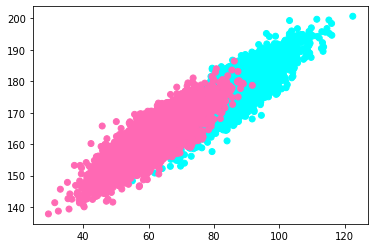

In [5]:
colors = ["cyan","hotpink"]
plt.scatter(data["Weight"],data["Height"],c=data["Gender"],cmap=ListedColormap(colors))

In [6]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
knn = KNeighborsClassifier(15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [11]:
from sklearn import metrics

In [12]:
report = metrics.accuracy_score(y_pred,y_test)

In [13]:
print(report)

0.913


In [14]:
class KNN:
    def __init__(self,k):
        self.k = k
    ## Train
    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(Y))
    
    def nearneighbors(self,x_test):
        dist = np.sqrt(np.sum((x_test-self.x_train)**2,axis=1))
        nearest = np.argsort(dist)[:self.k]
        return nearest
    
    ## Test
    def predict(self,x_test):
        nearest = self.nearneighbors(x_test)
        y = np.argmax(np.bincount(self.y_train[nearest]))
        return y
    
    def evaluate(self,x_test,y_test):
        y_pred = []
        for i in x_test:
            y_pred.append(self.predict(i))
        evaluate = (y_pred==y_test).sum()/len(y_pred)
        return evaluate
        

In [15]:
start_time = time.time()
knn = KNN(15)
knn.fit(x_train,y_train)
evaluate = knn.evaluate(x_test,y_test)
print(evaluate)
time.time() - start_time

0.913


1.3623876571655273